<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_LikhitaKoppuravuri/SkLearn_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#without pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from category_encoders import LeaveOneOutEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('crop_yield_dataset (1).xlsx')
print("Original dataset shape:", df.shape)
print("Number of rows with Crop_Yield = 0:", (df['Crop_Yield'] == 0).sum())
df_clean = df[df['Crop_Yield'] != 0].copy()
print(f"Dataset shape after removing zero Crop_Yield: {df_clean.shape}")
print(f"Removed {len(df) - len(df_clean)} rows with zero Crop_Yield")
X = df_clean.drop('Crop_Yield', axis=1)
y = df_clean['Crop_Yield']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['Crop_Type']
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
categorical_cols = ['Crop_Type', 'Soil_Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['Date']]
X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)
numerical_cols = [col for col in numerical_cols if col != 'Date']
print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")
loo_encoder = LeaveOneOutEncoder(cols=categorical_cols)
minmax_scaler = MinMaxScaler()
print("\nEncoding and scaling training data...")
loo_encoder.fit(X_train, y_train)
X_train_encoded = loo_encoder.transform(X_train)
minmax_scaler.fit(X_train_encoded[numerical_cols])
X_train_scaled = minmax_scaler.transform(X_train_encoded[numerical_cols])
X_train_final = X_train_encoded.copy()
X_train_final[numerical_cols] = X_train_scaled

print("Training data processing completed.")
print("\nTransforming test data...")
X_test_encoded = loo_encoder.transform(X_test)
X_test_scaled = minmax_scaler.transform(X_test_encoded[numerical_cols])
X_test_final = X_test_encoded.copy()
X_test_final[numerical_cols] = X_test_scaled
print("Test data processing completed.")
print(f"\nProcessed training set shape: {X_train_final.shape}")
print(f"Processed test set shape: {X_test_final.shape}")
print(f"\nProcessed training columns: {X_train_final.columns.tolist()}")
print("\nTraining Random Forest model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_final, y_train)
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
feature_importance = pd.DataFrame({
    'feature': X_train_final.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("TOP 10 FEATURE IMPORTANCES")
print("="*50)
print(feature_importance.head(10))

# Prediction comparison
results_comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Difference': y_test.values - y_test_pred
})

print("\n" + "="*50)
print("TEST SET PREDICTIONS COMPARISON (First 10 rows)")
print("="*50)
print(results_comparison.head(10))
print("\n" + "="*50)
print("TARGET VARIABLE STATISTICS")
print("="*50)
print(f"Training set - Crop_Yield stats:")
print(f"  Min: {y_train.min():.2f}, Max: {y_train.max():.2f}")
print(f"  Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Test set - Crop_Yield stats:")
print(f"  Min: {y_test.min():.2f}, Max: {y_test.max():.2f}")
print(f"  Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

Original dataset shape: (36520, 12)
Number of rows with Crop_Yield = 0: 11025
Dataset shape after removing zero Crop_Yield: (25495, 12)
Removed 11025 rows with zero Crop_Yield

Training set size: (20396, 11)
Test set size: (5099, 11)

Categorical columns: ['Crop_Type', 'Soil_Type']
Numerical columns: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

Encoding and scaling training data...
Training data processing completed.

Transforming test data...
Test data processing completed.

Processed training set shape: (20396, 10)
Processed test set shape: (5099, 10)

Processed training columns: ['Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

Training Random Forest model...

MODEL PERFORMANCE METRICS
Training RMSE: 1.7905
Test RMSE: 4.8636
Training MAE: 1.2403
Test MAE: 3.3275
Training R²: 0.9936
Test R²: 0.9528

TOP 10 FEATURE IMPORTANCES
        feature  importance
3   Temperature    0.468436
9  

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
#catboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
file_path = "crop_yield_dataset (1).xlsx"
df = pd.read_excel(file_path)
print("Dataset loaded successfully!")
print("Original shape:", df.shape)
target_col = 'Crop_Yield'
initial_shape = df.shape[0]
df_clean = df[df[target_col] != 0].copy()
removed_count = initial_shape - df_clean.shape[0]
print(f"Removed {removed_count} rows with zero Crop_Yield values")
print(f"New dataset shape: {df_clean.shape}")
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]
print(f"🎯 Target column: {target_col}")
print(f"Features shape: {X.shape}")
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])
    if 'Date' in numeric_cols:
        numeric_cols.remove('Date')
    print("Removed 'Date' column from features")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=X[categorical_cols[0]] if categorical_cols else None
)
print(f"\nData Split:")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
catboost_pipeline = Pipeline(steps=[
    ('regressor', CatBoostRegressor(
        cat_features=categorical_cols,  # CatBoost automatically handles categorical encoding
        random_state=42,
        verbose=False,  # Set to True to see training progress
        n_estimators=1000,
        learning_rate=0.1,
        depth=6
    ))
])
print(" Training CatBoost model...")
catboost_pipeline.fit(X_train, y_train)
print("CatBoost training complete!")

# Predictions
y_pred = catboost_pipeline.predict(X_test)
y_train_pred = catboost_pipeline.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
print("\n" + "="*60)
print(" CATBOOST EVALUATION METRICS")
print("="*60)
print(f"{'Metric':<15} {'Training':<12} {'Test':<12}")
print(f"{'RMSE':<15} {train_rmse:<12.4f} {rmse:<12.4f}")
print(f"{'MAE':<15} {train_mae:<12.4f} {mae:<12.4f}")
print(f"{'R² Score':<15} {train_r2:<12.4f} {r2:<12.4f}")
print(f"{'MSE':<15} {train_mse:<12.4f} {mse:<12.4f}")
feature_importances = catboost_pipeline.named_steps['regressor'].get_feature_importance()
feature_names = X_train.columns.tolist()
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
print(f"\n TOP 10 MOST IMPORTANT FEATURES:")
print("="*40)
print(importance_df.head(10))
print(f"\n TARGET VARIABLE STATISTICS (After removing zeros):")
print("="*50)
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")
print(f"Median: {y.median():.2f}")

# Prediction comparison
results_comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Absolute_Error': np.abs(y_test.values - y_pred),
    'Percentage_Error': (np.abs(y_test.values - y_pred) / y_test.values) * 100
})

print(f"\n PREDICTION COMPARISON (First 10 test samples):")
print("="*60)
print(results_comparison.head(10))
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(catboost_pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"\n Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Dataset loaded successfully!
Original shape: (36520, 12)
Removed 11025 rows with zero Crop_Yield values
New dataset shape: (25495, 12)
🎯 Target column: Crop_Yield
Features shape: (25495, 11)
Categorical columns (2): ['Crop_Type', 'Soil_Type']
Numeric columns (8): ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']
Removed 'Date' column from features

Data Split:
Train shape: (20396, 10), Test shape: (5099, 10)
 Training CatBoost model...
CatBoost training complete!

 CATBOOST EVALUATION METRICS
Metric          Training     Test        
RMSE            4.1875       4.5831      
MAE             2.9819       3.1826      
R² Score        0.9650       0.9581      
MSE             17.5351      21.0046     

 TOP 10 MOST IMPORTANT FEATURES:
        feature  importance
3   Temperature   41.173329
4      Humidity   24.539766
9  Soil_Quality   13.554718
6             N    8.044893
0     Crop_Type    7.705889
7             P    3.038979
2       Soil_pH    1.084791


In [ ]:
#pipeline with catboost
code = """import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')
file_path = "crop_yield_dataset (1).xlsx"
df = pd.read_excel(file_path)
print("Dataset loaded successfully!")
print("Original shape:", df.shape)
target_col = 'Crop_Yield'
initial_shape = df.shape[0]
df_clean = df[df[target_col] != 0].copy()
removed_count = initial_shape - df_clean.shape[0]
print(f"Removed {removed_count} rows with zero Crop_Yield values")
print(f"New dataset shape: {df_clean.shape}")
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]
print(f"🎯 Target column: {target_col}")
print(f"Features shape: {X.shape}")
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
if 'Date' in X.columns:
    X = X.drop(columns=['Date'])
    if 'Date' in numeric_cols:
        numeric_cols.remove('Date')
    print("Removed 'Date' column from features")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
    stratify=X[categorical_cols[0]] if categorical_cols else None
)
print(f"\nData Split:")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
catboost_pipeline = Pipeline(steps=[
    ('regressor', CatBoostRegressor(
        cat_features=categorical_cols,  # CatBoost automatically handles categorical encoding
        random_state=42,
        verbose=False,  # Set to True to see training progress
        n_estimators=1000,
        learning_rate=0.1,
        depth=6
    ))
])
print(" Training CatBoost model...")
catboost_pipeline.fit(X_train, y_train)
print("CatBoost training complete!")

# Predictions
y_pred = catboost_pipeline.predict(X_test)
y_train_pred = catboost_pipeline.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
print("\n" + "="*60)
print(" CATBOOST EVALUATION METRICS")
print("="*60)
print(f"{'Metric':<15} {'Training':<12} {'Test':<12}")
print(f"{'RMSE':<15} {train_rmse:<12.4f} {rmse:<12.4f}")
print(f"{'MAE':<15} {train_mae:<12.4f} {mae:<12.4f}")
print(f"{'R² Score':<15} {train_r2:<12.4f} {r2:<12.4f}")
print(f"{'MSE':<15} {train_mse:<12.4f} {mse:<12.4f}")
feature_importances = catboost_pipeline.named_steps['regressor'].get_feature_importance()
feature_names = X_train.columns.tolist()
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
print(f"\n TOP 10 MOST IMPORTANT FEATURES:")
print("="*40)
print(importance_df.head(10))
print(f"\n TARGET VARIABLE STATISTICS (After removing zeros):")
print("="*50)
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")
print(f"Median: {y.median():.2f}")

# Prediction comparison
results_comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Absolute_Error': np.abs(y_test.values - y_pred),
    'Percentage_Error': (np.abs(y_test.values - y_pred) / y_test.values) * 100
})

print(f"\n PREDICTION COMPARISON (First 10 test samples):")
print("="*60)
print(results_comparison.head(10))
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(catboost_pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"\n Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")"""

In [ ]:
with open("crop_yield_model.py", "w") as f:
    f.write(code)

print("✅ Code saved as 'crop_yield_model.py'")

✅ Code saved as 'crop_yield_model.py'


In [ ]:
from google.colab import files
files.download("crop_yield_model.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python crop_yield_model.py

  File "/content/crop_yield_model.py", line 38
    print(f"
          ^
SyntaxError: unterminated f-string literal (detected at line 38)


In [ ]:
import os
print("File size:", os.path.getsize('catboost_crop_yield_model.pkl'), "bytes")

File size: 0 bytes


In [ ]:
catboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('regressor',
                 <catboost.core.CatBoostRegressor object at 0x7c0aafd51040>)])

In [ ]:
import pickle
with open('catboost_crop_yield_model.pkl', 'wb') as f:
    pickle.dump(catboost_pipeline, f)

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.0 MB/s eta 0:00:00


# Stationary test

In [ ]:
#get crpDataSet_avg file
#adf test - stationary
#acf-non stationary
from statsmodels.tsa.stattools import adfuller
import pandas as pd
df = pd.read_csv("crpDataSet_avg.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
time_series = df['Crop_Yield']
adf_test_result = adfuller(time_series, autolag='AIC', regression='c')
print('Augmented Dickey-Fuller Test Results:')
print(f'ADF Test Statistic: {adf_test_result[0]:.4f}')
print(f'p-value: {adf_test_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_test_result[4].items():
    print(f' {key}: {value:.4f}')

Augmented Dickey-Fuller Test Results:
ADF Test Statistic: -7.1481
p-value: 0.0000
Critical Values:
 1%: -3.4322
 5%: -2.8623
 10%: -2.5672


In [ ]:
#kpss test - stationary
from statsmodels.tsa.stattools import kpss
import pandas as pd
df = pd.read_csv("crpDataSet_avg.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
time_series = df['Crop_Yield']
kpss_test_result = kpss(time_series, regression='c', nlags='auto')
test_statistic = kpss_test_result[0]
p_value = kpss_test_result[1]
lags_used = kpss_test_result[2]
critical_values = kpss_test_result[3]
print('KPSS Test Results:')
print(f'KPSS Test Statistic: {test_statistic:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Lags Used: {lags_used}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'  {key}: {value:.4f}')

KPSS Test Results:
KPSS Test Statistic: 0.0434
p-value: 0.1000
Lags Used: 35
Critical Values:
  10%: 0.3470
  5%: 0.4630
  2.5%: 0.5740
  1%: 0.7390


/tmp/ipython-input-3492647319.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_result = kpss(time_series, regression='c', nlags='auto')


In [ ]:
#pacf test
import pandas as pd
import numpy as np
from scipy.stats import norm
df = pd.read_csv("crpDataSet_avg.csv")
time_series = df['Crop_Yield']
N = len(time_series)
alpha = 0.05
z_score = norm.ppf(1 - alpha/2)
critical_value = z_score / np.sqrt(N)
print(f'Number of Observations (N): {N}')
print(f'Critical Value (approximate 95% confidence band for PACF): ±{critical_value:.4f}')

Number of Observations (N): 3624
Critical Value (approximate 95% confidence band for PACF): ±0.0326


<Figure size 1200x600 with 0 Axes>

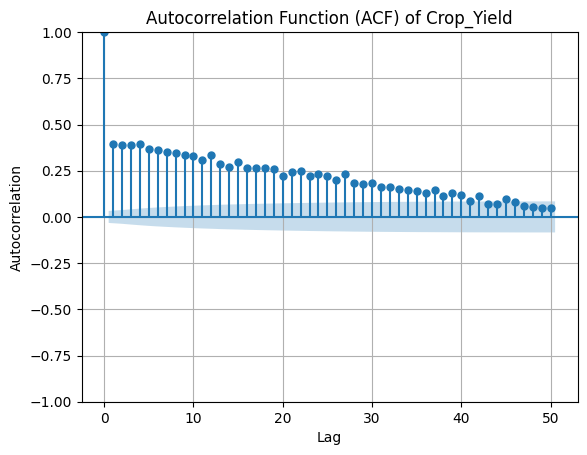

<Figure size 1200x600 with 0 Axes>

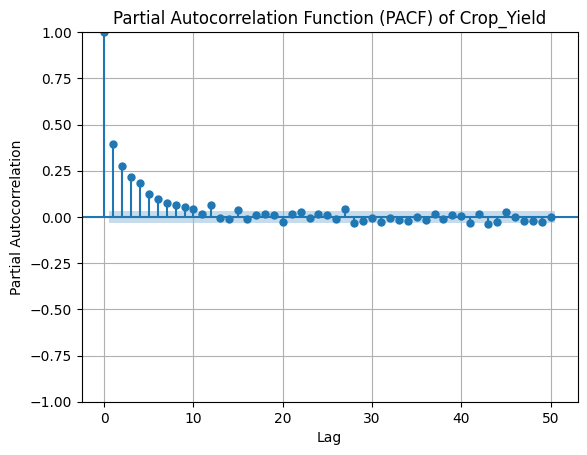

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv("crpDataSet_avg.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
time_series = df['Crop_Yield']
plt.figure(figsize=(12, 6))
plot_acf(
    time_series,
    lags=50,
    title='Autocorrelation Function (ACF) of Crop_Yield'
)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show() # Use plt.show() for interactive environments
plt.figure(figsize=(12, 6))
# method='ywm' is often used for stationary series
plot_pacf(
    time_series,
    lags=50,
    title='Partial Autocorrelation Function (PACF) of Crop_Yield',
    method='ywm'
)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show() # Use plt.show() for interactive environments
           # or plt.savefig('pacf_crop_yield.png') to save

# New section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse

# --- 1. Data Loading and Preparation ---
# Load the dataset
df = pd.read_csv('crpDataSet_avg0.csv')

# Prepare the time series data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
ts = df['Crop_Yield'].copy()

# --- 2. Stationarity Check (ADF Test) ---
def adf_test(series):
    """Performs the Augmented Dickey-Fuller Test."""
    result = adfuller(series, autolag='AIC')
    print("--- Augmented Dickey-Fuller Test Results ---")
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.10f}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.4f}')

adf_test(ts)

# --- 3. ACF and PACF Plots for Model Identification ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ts, lags=50, ax=axes[0], title='Autocorrelation Function (ACF)')
plot_pacf(ts, lags=50, ax=axes[1], title='Partial Autocorrelation Function (PACF)')
plt.suptitle('ACF and PACF of Original Crop Yield Series', y=1.02)
plt.tight_layout()
plt.savefig('crop_yield_acf_pacf_original.png')
plt.close()

# --- 4. SARIMA Model Fitting and Forecasting ---
# Split data into train and test sets (90% train, 10% test)
train_size = int(len(ts) * 0.9)
train_ts = ts[:train_size]
test_ts = ts[train_size:]

# SARIMA Model Parameters (p, d, q) x (P, D, Q, S)
# Based on ADF test (stationary), initial guess: (1, 0, 1) x (0, 0, 1, 7)
order = (1, 0, 1)
seasonal_order = (0, 0, 1, 7)

try:
    # Fit the SARIMA model
    model = SARIMAX(train_ts,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit(disp=False)

    # Print Model Summary
    print("\n--- SARIMA Model Summary ---")
    print(results.summary())

    # Generate predictions on the test set
    start = len(train_ts)
    end = len(ts) - 1
    # dynamic=False means using actual values for the one-step ahead predictions
    predictions = results.get_prediction(start=start, end=end, dynamic=False)
    predicted_mean = predictions.predicted_mean

    # --- 5. Calculate and Print Metrics on the Test Set ---
    actuals = test_ts
    mse = mean_squared_error(actuals, predicted_mean)
    mae = mean_absolute_error(actuals, predicted_mean)
    rmse_val = rmse(actuals, predicted_mean)

    print("\n--- Forecast Evaluation Metrics (on Test Set) ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse_val:.4f}")

    # --- 6. Plot the Fit and Forecast ---
    plt.figure(figsize=(12, 6))

    # Plot training, actual test data, and forecast
    plt.plot(train_ts.index, train_ts.values, label='Training Data', color='blue')
    plt.plot(test_ts.index, test_ts.values, label='Actual Test Data', color='green')
    plt.plot(predicted_mean.index, predicted_mean.values,
             label='SARIMA Forecast', color='red', linestyle='--')

    plt.title(f'Crop Yield SARIMA({order[0]}, {order[1]}, {order[2]})x({seasonal_order[0]}, {seasonal_order[1]}, {seasonal_order[2]}, {seasonal_order[3]}) Forecast')
    plt.xlabel('Date')
    plt.ylabel('Crop Yield')
    plt.legend()
    plt.grid(True)
    plt.savefig('crop_yield_sarima_forecast.png')
    plt.close()

except Exception as e:
    print(f"An error occurred during SARIMA fitting or forecasting: {e}")

--- Augmented Dickey-Fuller Test Results ---
ADF Statistic: -7.1481
p-value: 0.0000000003
Critical Value (1%): -3.4322
Critical Value (5%): -2.8623
Critical Value (10%): -2.5672


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



--- SARIMA Model Summary ---
                                     SARIMAX Results                                     
Dep. Variable:                        Crop_Yield   No. Observations:                 3261
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 7)   Log Likelihood              -12083.885
Date:                           Sat, 08 Nov 2025   AIC                          24175.770
Time:                                   04:13:44   BIC                          24200.118
Sample:                                        0   HQIC                         24184.492
                                          - 3261                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.001   1192.058      0.000       0.997       1.001
ma.L1        

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#arima
import pandas as pd

# Load a smaller version of your dataset
df = pd.read_csv('crpDataSet_avg0.csv', parse_dates=['Date'], index_col='Date')
ts = df['Crop_Yield']  # Replace with your actual column name

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -7.148107107472068
p-value: 3.1933108529337154e-10


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(5,1,1))  # Replace with chosen p,d,q
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Crop_Yield   No. Observations:                 3624
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -13511.969
Date:                Sat, 08 Nov 2025   AIC                          27037.938
Time:                        05:14:40   BIC                          27081.304
Sample:                             0   HQIC                         27053.388
                               - 3624                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0007      0.024     -0.027      0.978      -0.047       0.046
ar.L2          0.0052      0.021      0.246      0.806      -0.037       0.047
ar.L3          0.0184      0.021      0.884      0.3

In [ ]:
# AIC and BIC
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

# Forecast and RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

forecast = model_fit.predict(start=0, end=len(ts)-1)
rmse = np.sqrt(mean_squared_error(ts, forecast))
print(f"RMSE: {rmse}")

# R² Score
ss_res = np.sum((ts - forecast) ** 2)
ss_tot = np.sum((ts - np.mean(ts)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R²: {r_squared}")

AIC: 27037.938369135445
BIC: 27081.30377297171
RMSE: 10.117161818526316
R²: 0.2979335761667762


In [ ]:
!pip install statsmodels pmdarima

In [ ]:
#sarimax
import pandas as pd

df = pd.read_csv('crpDataSet_avg0.csv', parse_dates=['Date'], index_col='Date')
ts = df['Crop_Yield']  # Replace with your actual column name

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(ts,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()
print(sarima_result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Crop_Yield   No. Observations:                 3624
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -13444.966
Date:                            Sat, 08 Nov 2025   AIC                          26899.932
Time:                                    05:38:55   BIC                          26930.871
Sample:                                         0   HQIC                         26910.958
                                           - 3624                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0163      0.017     -0.964      0.335      -0.049       0.017
ma.L1         -0.8435      0.010   

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

forecast = sarima_result.predict(start=0, end=len(ts)-1)
rmse = np.sqrt(mean_squared_error(ts, forecast))
ss_res = np.sum((ts - forecast) ** 2)
ss_tot = np.sum((ts - np.mean(ts)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"AIC: {sarima_result.aic}")
print(f"BIC: {sarima_result.bic}")
print(f"RMSE: {rmse}")
print(f"R²: {r_squared}")

AIC: 26899.931675282027
BIC: 26930.870952500503
RMSE: 10.222108232093955
R²: 0.28329281099065096
